## Importing Necessaries Library

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset 

In [79]:
data=pd.read_csv("train.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Data visualisation

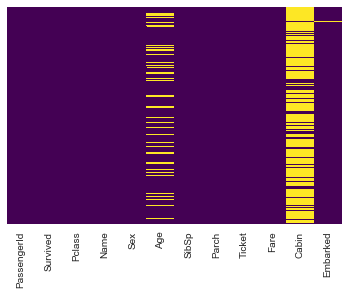

In [81]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

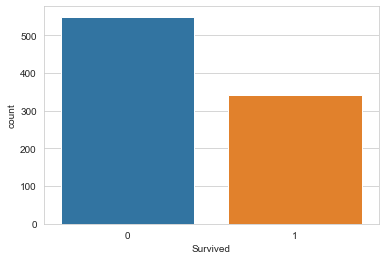

In [82]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

In [83]:
data[data["Survived"]==1].Survived.count()

342

In [84]:
data[data["Survived"]==0].Survived.count()

549

### Here we conclude that 342 people on the ship are survived and remaining 549 people are not able to survived

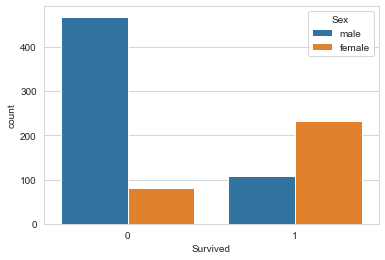

In [85]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue="Sex",data=data)

### Above countplot graph indicate that most of people which are not survived are males as compared to females

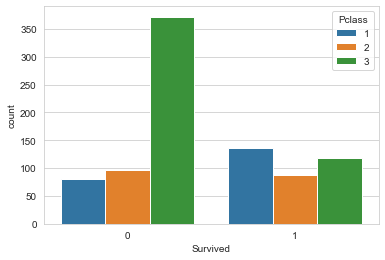

In [86]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue="Pclass",data=data)

### Most of the people of Pclass=3 are not able to survived while Pclass=1 most of them are survived

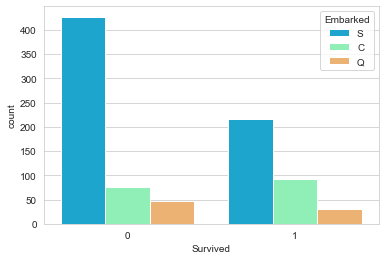

In [87]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue="Embarked",palette='rainbow',data=data)

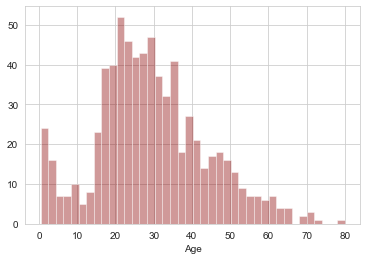

In [88]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)

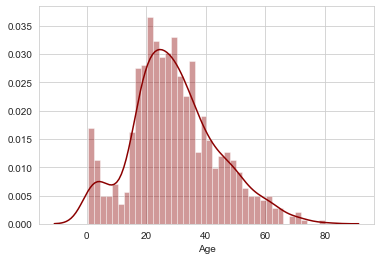

In [89]:
sns.distplot(data['Age'].dropna(),color='darkred',bins=40)

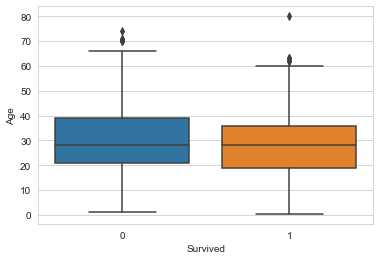

In [90]:
sns.boxplot(x="Survived",y='Age',data=data)

In [91]:
avg_age0=data[data["Survived"]==0].Age.sum()/data[data["Survived"]==0].Age.count()
round(avg_age0)

31.0

In [92]:
avg_age1=data[data["Survived"]==1].Age.sum()/data[data["Survived"]==1].Age.count()
round(avg_age1)

28.0

### Average Age of Survived People is 28 year and Unsurvived People is 31 year

## Data Cleaning

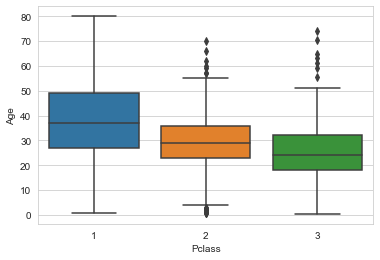

In [93]:
sns.boxplot(x="Pclass",y='Age',data=data)

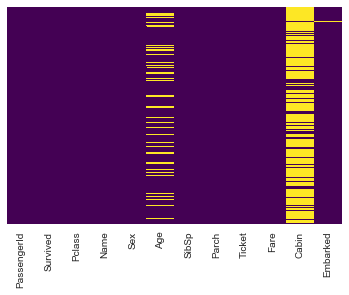

In [94]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [95]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [96]:
data['Age']=data[['Age','Pclass']].apply(input_age,axis=1)


In [97]:
def data_clean(data):
    data=data.drop(["Ticket","Cabin","Name","PassengerId"], axis=1)
    cols=["SibSp","Parch","Fare","Age"]
    for col in cols:
        data[col].fillna(data[col].median(),inplace=True)
    data.Embarked.fillna("U",inplace=True)
    return data


In [98]:
data=data_clean(data)


In [99]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

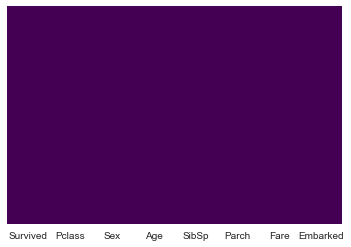

In [100]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [101]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [102]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [103]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)
embark.head()

,Q,S,U
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [104]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [105]:
 data=data.drop(["Sex","Embarked"], axis=1)

In [106]:
data=pd.concat([data,sex,embark],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,U
0,0,3,22.0,1,0,7.2500,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0


In [107]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,U
0,0,3,22.0,1,0,7.2500,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0


In [108]:
data.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
U           0
dtype: int64

## Implement Logistic Regression 

In [109]:
x=data.drop("Survived",axis=1)
y=data['Survived']

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [111]:
lr=LogisticRegression(random_state=0,max_iter=1000).fit(x_train,y_train)

In [112]:
pred=lr.predict(x_test)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)


0.7835820895522388